# Experiment: Improve Hornsrev 1 layout

### Import supporting libraries like NumPy and Matplotlib

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Import and instantiate relevant PyWake objects
We operate with four fundamental objects in PyWake, namely `Site`, `WindTurbines` and `WindFarmModel`, as explained here: https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/Introduction.html.

In [3]:
from py_wake.examples.data.hornsrev1 import V80 # The farm is comprised of 80 V80 turbines which
from py_wake.examples.data.hornsrev1 import Hornsrev1Site # We work with the Horns Rev 1 site, which comes already set up with PyWake.
from py_wake.examples.data.hornsrev1 import wt_x, wt_y # The existing layout coordinates are also available from PyWake 
# PyWake acts a library for multiple model combinations. 
# BastankhahGaussian combines the engineering wind farm model, `PropagateDownwind` with 
# the `BastankhahGaussianDeficit` wake deficit model and the `SquaredSum` super position model 
from py_wake import BastankhahGaussian 

# After we import the objects we instatiate them:
site = Hornsrev1Site() 
wt = V80()
windFarmModel = BastankhahGaussian(site, wt)

### The site object
There are multiple functionalities available from the site object as well as wind conditions, probability and geometry of the wind farm. We can e.g. plot the wind rose with a specific number of bins by using the plot_wd_distribution function:

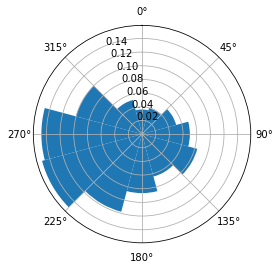

In [4]:
site.plot_wd_distribution(n_wd=12);

### The wind turbine object
As for the site this object contains relevant information as well as supplying usefull functions. It holds information about the power curve, ct-curve, hub height and diameter and has a plotting function to visualize the layout of the turbines including the naming:

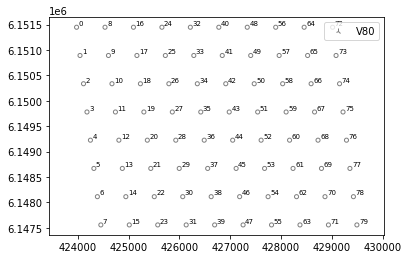

In [5]:
# Original layout
plt.figure()
wt.plot(wt_x, wt_y)

### Calculate AEP

In [6]:
# Original AEP
aep_ref = windFarmModel(wt_x,wt_y).aep().sum()
print (aep_ref)

<xarray.DataArray 'AEP [GWh]' ()>
array(682.04072529)


## Exercise: Improve the AEP by modifying turbine locations.

Modify the x and y offsets for the rows and columns to increase the AEP.

Note, the turbines positions are limited by a rectangle surrounding the existing layout

In [7]:
# Here we define a function to print and plot your new layout. No need to change anything here
def add_offset_plot_and_print(row_offset_x, row_offset_y, col_offset_x, col_offset_y):
    x,y = wt_x, wt_y
    y = np.reshape(y,(10,8)).astype(float)
    x = np.reshape(x,(10,8)).astype(float)

    x+= np.array(row_offset_x)
    y+= np.array(row_offset_y)
    x+= np.array(col_offset_x)[:,np.newaxis]
    y+= np.array(col_offset_y)[:,np.newaxis]
    y = np.maximum(min(wt_y), np.minimum(max(wt_y), y.flatten()))
    x = np.maximum(min(wt_x), np.minimum(max(wt_x), x.flatten()))

    plt.plot()
    plt.plot(wt_x, wt_y,'b.')
    wt.plot(x, y)
    aep = windFarmModel(x,y).aep().sum()
    print ("AEP ref", aep_ref.values)
    print ("AEP", aep.values)
    print ("Increase: %f %%"%((aep-aep_ref)/aep_ref*100))

Now try to modify the row and column offsets and see if you can improve the AEP

AEP ref 682.0407252944838
AEP 682.2122958662208
Increase: 0.025155 %


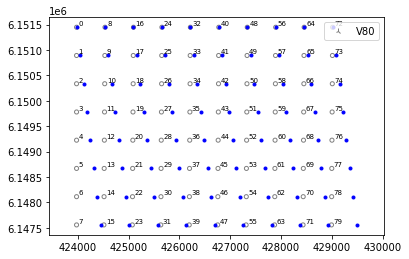

In [8]:
# =======================================
# Specify offsets 
# =======================================
row_offset_x = np.linspace(0,1,8)* -500
row_offset_y = np.linspace(0,1,8) * 0

col_offset_x = np.linspace(0,1,10) * 0
col_offset_y = np.linspace(0,1,10) * 0

add_offset_plot_and_print(row_offset_x, row_offset_y, col_offset_x, col_offset_y)
